In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Data Cleaning Tasks:

 1. Do the height and weight columns have the appropriate data dytes.  
 2. Can you separate the joined column into year, month, and day columns?  
 3. Clean and transform the value, wage and releae clause columns into columns for integers?  
 4. How can you Remove the unnecessary newline characters from all columns that have them. 
 5. Some columns have 'star' characters. Strip those columns of these stars and make the columns numerical
 6. Based on the 'Joined' column, check which players have been playing at a club for more than 10 years! 



How to build a strong team that is not inferior to the top-ranked teams, and even a potentially powerful contender for the championship?  (Wage salary expense should be less than 1/3 of the top 3 Club).  

1. Which players are highly valuable but still underpaid (on low wages)?  
2. At what age do players tend to be highly valuable but still underpaid?
3. What is the wage budget that can turn a club into a potential contender even for a championship?  
4. For those competitive young team in 2.3, what position they focus on?  
5. Which countries should club managers look to for potential talent to develop?  





In [2]:
df = pd.read_csv("fifa21 raw data v2.csv", sep = ',')

C:\Users\fadea\AppData\Local\Temp\ipykernel_7764\136846397.py:1: DtypeWarning: Columns (76) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("fifa21 raw data v2.csv", sep = ',')


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 77 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                18979 non-null  int64 
 1   Name              18979 non-null  object
 2   LongName          18979 non-null  object
 3   photoUrl          18979 non-null  object
 4   playerUrl         18979 non-null  object
 5   Nationality       18979 non-null  object
 6   Age               18979 non-null  int64 
 7   ↓OVA              18979 non-null  int64 
 8   POT               18979 non-null  int64 
 9   Club              18979 non-null  object
 10  Contract          18979 non-null  object
 11  Positions         18979 non-null  object
 12  Height            18979 non-null  object
 13  Weight            18979 non-null  object
 14  Preferred Foot    18979 non-null  object
 15  BOV               18979 non-null  int64 
 16  Best Position     18979 non-null  object
 17  Joined      

In [4]:
pd.set_option("display.max_columns",100)

In [5]:
df.head()

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,Contract,Positions,Height,Weight,Preferred Foot,BOV,Best Position,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,\n\n\n\nFC Barcelona,2004 ~ 2021,"RW, ST, CF",170cm,72kg,Left,93,RW,"Jul 1, 2004",NaN,€103.5M,€560K,€138.4M,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4 ★,4★,Medium,Low,5 ★,85,92,91,95,38,65,771
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,\n\n\n\nJuventus,2018 ~ 2022,"ST, LW",187cm,83kg,Right,92,ST,"Jul 10, 2018",NaN,€63M,€220K,€75.9M,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4 ★,5★,High,Low,5 ★,89,93,81,89,35,77,562
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,\n\n\n\nAtlético Madrid,2014 ~ 2023,GK,188cm,87kg,Right,91,GK,"Jul 16, 2014",NaN,€120M,€125K,€159.4M,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3 ★,1★,Medium,Medium,3 ★,87,92,78,90,52,90,150
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91,91,\n\n\n\nManchester City,2015 ~ 2023,"CAM, CM",181cm,70kg,Right,91,CAM,"Aug 30, 2015",NaN,€129M,€370K,€161M,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,2304,485,5 ★,4★,High,High,4 ★,76,86,93,88,64,78,207
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91,91,\n\n\n\nParis Saint-Germain,2017 ~ 2022,"LW, CAM",175cm,68kg,Right,91,LW,"Aug 3, 2017",NaN,€132M,€270K,€166.5M,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,93,94,35,30,29,59,9,9,15,15,11,2175,451,5 ★,5★,High,Medium,5 ★,91,85,86,94,36,59,595


## 1. Data Cleaning and Data Preparation.

 #### 1.1 Data Transformation
    Handling "Height" and "Weight" columns

In [6]:
# Height

df.Height.unique()

array(['170cm', '187cm', '188cm', '181cm', '175cm', '184cm', '191cm',
       '178cm', '193cm', '185cm', '199cm', '173cm', '168cm', '176cm',
       '177cm', '183cm', '180cm', '189cm', '179cm', '195cm', '172cm',
       '182cm', '186cm', '192cm', '165cm', '194cm', '167cm', '196cm',
       '163cm', '190cm', '174cm', '169cm', '171cm', '197cm', '200cm',
       '166cm', '6\'2"', '164cm', '198cm', '6\'3"', '6\'5"', '5\'11"',
       '6\'4"', '6\'1"', '6\'0"', '5\'10"', '5\'9"', '5\'6"', '5\'7"',
       '5\'4"', '201cm', '158cm', '162cm', '161cm', '160cm', '203cm',
       '157cm', '156cm', '202cm', '159cm', '206cm', '155cm'], dtype=object)

In [7]:
# I need to create a function that deals with two types of strings. One type is 'xxxcm,' and the other is 'x'xx.'"

In [8]:
def convert_height_cm(x):
    if 'cm' in x:
        return int(x.replace('cm', ''))
    else:
        height = x.split("'")
        return round(int(height[0])*30.48+int(height[1][:-1])*2.54)

In [9]:
df['Height'] = df['Height'].apply(convert_height_cm)

In [10]:
df.Height.dtypes

dtype('int64')

In [11]:
def conver_height_cm(x):
    if 'cm' in x:
        return int(x.replace('cm', ''))
    else:
        height = x.split("'")
        return round(int(height[0])*30.48+int(height[1][:-1])*2.54)
    
print(conver_height_cm("6'0\""))

183


In [12]:
# Weight

In [13]:
df.Weight.unique()

array(['72kg', '83kg', '87kg', '70kg', '68kg', '80kg', '71kg', '91kg',
       '73kg', '85kg', '92kg', '69kg', '84kg', '96kg', '81kg', '82kg',
       '75kg', '86kg', '89kg', '74kg', '76kg', '64kg', '78kg', '90kg',
       '66kg', '60kg', '94kg', '79kg', '67kg', '65kg', '59kg', '61kg',
       '93kg', '88kg', '97kg', '77kg', '62kg', '63kg', '95kg', '100kg',
       '58kg', '183lbs', '179lbs', '172lbs', '196lbs', '176lbs', '185lbs',
       '170lbs', '203lbs', '168lbs', '161lbs', '146lbs', '130lbs',
       '190lbs', '174lbs', '148lbs', '165lbs', '159lbs', '192lbs',
       '181lbs', '139lbs', '154lbs', '157lbs', '163lbs', '98kg', '103kg',
       '99kg', '102kg', '56kg', '101kg', '57kg', '55kg', '104kg', '107kg',
       '110kg', '53kg', '50kg', '54kg', '52kg'], dtype=object)

In [14]:
def weight_to_kg(x):
    if "kg" in x:
        return int(x[:-2])
    else:
        return round(int(x[:-3])*0.45359237)
    
df["Weight"] = df.Weight.apply(weight_to_kg)

In [15]:
df.Weight.dtype

dtype('int64')

In [16]:
df.rename(columns = {'Height':'Height_cm', 'Weight':'Weight_kg'}, inplace = True)
df.columns

Index(['ID', 'Name', 'LongName', 'photoUrl', 'playerUrl', 'Nationality', 'Age',
       '↓OVA', 'POT', 'Club', 'Contract', 'Positions', 'Height_cm',
       'Weight_kg', 'Preferred Foot', 'BOV', 'Best Position', 'Joined',
       'Loan Date End', 'Value', 'Wage', 'Release Clause', 'Attacking',
       'Crossing', 'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys',
       'Skill', 'Dribbling', 'Curve', 'FK Accuracy', 'Long Passing',
       'Ball Control', 'Movement', 'Acceleration', 'Sprint Speed', 'Agility',
       'Reactions', 'Balance', 'Power', 'Shot Power', 'Jumping', 'Stamina',
       'Strength', 'Long Shots', 'Mentality', 'Aggression', 'Interceptions',
       'Positioning', 'Vision', 'Penalties', 'Composure', 'Defending',
       'Marking', 'Standing Tackle', 'Sliding Tackle', 'Goalkeeping',
       'GK Diving', 'GK Handling', 'GK Kicking', 'GK Positioning',
       'GK Reflexes', 'Total Stats', 'Base Stats', 'W/F', 'SM', 'A/W', 'D/W',
       'IR', 'PAC', 'SHO', 'PAS', 'DRI', '

#### 1.2 Split Data into Separate Columns
    Separate the joined column into year, month, and day columns

In [17]:
df['Joined'] = pd.to_datetime(df.Joined)

In [18]:
df['Joined_Year'] = df.Joined.dt.year
df['Joined_month'] = df.Joined.dt.month
df['Joined_day'] = df.Joined.dt.day

#### 1.3 Formatting columns
    Transform the value, wage and releae clause columns into columns to integers

In [19]:
# Check the amount in the 'Value', 'Wage', 'Release Clause' that if it doesn't contain string 'K' or 'M'

In [20]:
df[~df.Value.str.contains('K|M')].Value.value_counts()

€0    248
Name: Value, dtype: int64

In [21]:
df[~df.Wage.str.contains('K|M')].Wage.unique()

array(['€0', '€900', '€850', '€500', '€700', '€950', '€750', '€650',
       '€600', '€800', '€550'], dtype=object)

In [22]:
df[~df['Release Clause'].str.contains('K|M')]['Release Clause'].unique()

array(['€0'], dtype=object)

In [23]:
#Create a function to formate the amount in the columns

def format_the_amount(x):
    x = x.replace('€', '')
    if 'M' in x:
        return int(float(x[:-1])*1000*1000)
    elif 'K' in x:
        return int(float(x[:-1])*1000)
    else:
        return round(float(x))
    

In [24]:
df.loc[:,['Value', 'Wage', 'Release Clause']] = df[['Value', 'Wage', 'Release Clause']].applymap(format_the_amount)

In [25]:
df[['Value', 'Wage', 'Release Clause']].head()

,Value,Wage,Release Clause
0,103500000,560000,138400000
1,63000000,220000,75900000
2,120000000,125000,159400000
3,129000000,370000,161000000
4,132000000,270000,166500000


In [26]:
df['Value'] = df['Value'].astype(int)
df['Wage'] = df['Wage'].astype(int)
df['Release Clause'] = df['Release Clause'].astype(int)

#### 1.4 Strip columns with 'star' characters
    --then transform to numeric value

In [27]:
df.IR.unique()

array(['5 ★', '3 ★', '4 ★', '2 ★', '1 ★'], dtype=object)

In [28]:
df.SM.unique()

array(['4★', '5★', '1★', '2★', '3★'], dtype=object)

In [29]:
df['W/F'].unique()

array(['4 ★', '3 ★', '5 ★', '2 ★', '1 ★'], dtype=object)

In [30]:
# Remove star and whitespace
df['IR'] = df.IR.str.strip('★').str.strip().astype(int)
df['SM'] = df.SM.str.strip('★').str.strip().astype(int)
df['W/F'] = df['W/F'].str.strip('★').str.strip().astype(int)

In [31]:
df.IR.head()

0    5
1    5
2    3
3    4
4    5
Name: IR, dtype: int32

#### 1.5 Cleaning the unnecessary  characters
    Remove newline characters (\n) from all columns that have them

In [32]:
# Check which column that contians newline characters.
df.columns[df.astype('str').apply(lambda col: col.str.contains('\\n').any())]

Index(['Club'], dtype='object')

In [33]:
df['Club'] = df.Club.str.replace('\n', '', regex=False)

In [34]:
df.Club.head(3)

0       FC Barcelona
1           Juventus
2    Atlético Madrid
Name: Club, dtype: object

#### 1.6 Players who have played  more than 10 years in the club.

In [35]:
df['Membership_Duration'] = 2023-df.Joined_Year

In [36]:
df[df['Membership_Duration']>10].LongName.unique()

array(['Lionel Messi', 'Manuel Neuer', 'Karim Benzema',
       'Sergio Ramos García', 'Sergio Agüero', 'Harry Kane',
       'Samir Handanovič', 'Giorgio Chiellini', 'Sergio Busquets Burgos',
       'Luka Modrić', 'Hugo Lloris', 'Thomas Müller',
       'David De Gea Quintana', 'Raphaël Varane', 'Marco Verratti',
       'Jamie Vardy', 'Gerard Piqué Bernabeu', 'Jordi Alba Ramos',
       'Jordan Henderson', 'Lorenzo Insigne', 'Jorge Resurrección',
       'Marco Reus', 'David Alaba', 'César Azpilicueta Tanco',
       'Kasper Schmeichel', 'Thomas Strakosha', 'José Luís Gayà Peña',
       'Edin Višća', 'Anthony Lopes', 'Iker Muniain Goñi',
       'Marcelo Vieira da Silva', 'Alphonse Areola',
       'Mário Figueira Fernandes', 'Karim Bellarabi', 'Lars Bender',
       'Fernando Muslera', 'Jérôme Boateng', 'Iñaki Williams Arthuer',
       'Alessandro Florenzi', 'Javier Martínez Aginaga',
       'Stéphane Ruffier', 'Segundo Mandíquez', 'Jack Grealish',
       'Domenico Berardi', 'José Ignacio Fer

#### 1.7 Create a Contract_length column    

In [37]:
df.Contract.unique()

array(['2004 ~ 2021', '2018 ~ 2022', '2014 ~ 2023', '2015 ~ 2023',
       '2017 ~ 2022', '2017 ~ 2023', '2018 ~ 2024', '2014 ~ 2022',
       '2018 ~ 2023', '2016 ~ 2023', '2013 ~ 2023', '2011 ~ 2023',
       '2009 ~ 2022', '2005 ~ 2021', '2011 ~ 2021', '2015 ~ 2022',
       '2017 ~ 2024', '2010 ~ 2024', '2012 ~ 2021', '2019 ~ 2024',
       '2015 ~ 2024', '2017 ~ 2025', '2020 ~ 2025', '2019 ~ 2023',
       '2008 ~ 2023', '2015 ~ 2021', '2020 ~ 2022', '2012 ~ 2022',
       '2016 ~ 2025', '2013 ~ 2022', '2011 ~ 2022', '2012 ~ 2024',
       '2016 ~ 2021', '2012 ~ 2023', '2008 ~ 2022', '2019 ~ 2022',
       '2017 ~ 2021', '2013 ~ 2024', '2020 ~ 2024', '2010 ~ 2022',
       '2020 ~ 2021', '2011 ~ 2024', '2020 ~ 2023', '2014 ~ 2024',
       '2013 ~ 2026', '2016 ~ 2022', '2010 ~ 2021', '2013 ~ 2021',
       '2019 ~ 2025', '2018 ~ 2025', '2016 ~ 2024', '2018 ~ 2021',
       '2009 ~ 2024', '2007 ~ 2022', 'Jun 30, 2021 On Loan',
       '2009 ~ 2021', '2019 ~ 2021', '2019 ~ 2026', 'Free', '2012 ~ 

In [38]:
# There 3 types of contracts. 'Free', 'On Loan' and 'Regular contract'
# Trying to build a function to calculate them separately.

In [39]:
def calculate_contract_length(years):
    
    # Dealing with 'regular contract like '2007 ~ 2022'
    if '~' in years:
        start_year, end_year = map(int, years.split(' ~ '))
        return end_year - start_year
    
    # Dealing with 'On Loan' contract like 'Nov 22, 2020 On Loan'
    elif 'Loan' in years:
        years = years.replace('On Loan', '')
        differ_date = pd.to_datetime(years) - pd.to_datetime('2021-01-01')
        differ_date = differ_date.total_seconds() / pd.Timedelta(days =365).total_seconds()
        return round(differ_date,1) if differ_date > 0 else 0
    
    # Dealing with 'Free' contract
    else:
        return 0

In [40]:
df['Contract_length'] = df['Contract'].apply(calculate_contract_length)

## 2. Data exploring and answer guiding questions?
#### 2.1 Which players are highly valuable but still underpaid (on low wages)?

In [41]:
df[['Wage','Value']].corr()

,Wage,Value
Wage,1.00000,0.81487
Value,0.81487,1.00000


In [42]:
# The association between Wage and Value is high. Let's use scatter plot to take a look of it.

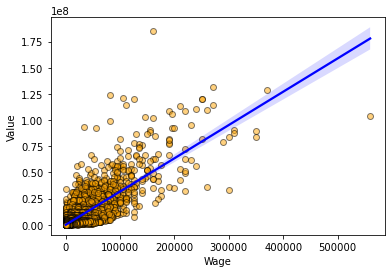

In [43]:
sns.regplot(x='Wage', 
            y='Value', 
            data=df,
            scatter_kws={'edgecolor' : 'black', 'linewidth' : 1, 'alpha':0.5, 'color' : 'orange'},
            line_kws = {'color':'blue'}
           )
plt.show()

In [44]:
print(df.query('Wage < 200000 and Value >75000000').LongName)

2                                Jan Oblak
7                    Alisson Ramses Becker
8                            Kylian Mbappé
19                            N'Golo Kanté
20                          Joshua Kimmich
21                            Paulo Dybala
22               Ederson Santana de Moraes
25                       Kalidou Koulibaly
29                            Jadon Sancho
30                  Trent Alexander-Arnold
32                        Andrew Robertson
34           Bruno Miguel Borges Fernandes
35                  Fábio Henrique Tavares
36                           Heung Min Son
37     Roberto Firmino Barbosa de Oliveira
47                           Ciro Immobile
52                          Marco Verratti
53                              Paul Pogba
65                             Kai Havertz
66                        Matthijs de Ligt
68                         Marcus Rashford
69                    Gianluigi Donnarumma
71                              Leroy Sané
80         

#### 2.2 At what age do players tend to be highly valuable but still underpaid?

21    962
23    959
22    935
24    871
20    845
25    670
19    635
26    600
18    551
27    547
Name: Age, dtype: int64

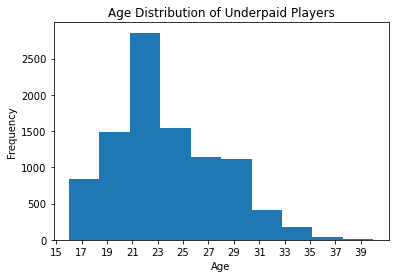

In [45]:
from scipy import stats
s, b, r, p, stderr = stats.linregress(df.Wage, df.Value)
y_predited = s * df.Wage + b

display(df[df.Value > y_predited].Age.value_counts().head(10))

df[df.Value > y_predited].Age.plot(kind='hist')

plt.title("Age Distribution of Underpaid Players")
plt.xlabel('Age')
plt.xticks(np.arange(15,40,2))

plt.show()

In [46]:
# It indicated that players aged 21 to 23 represent the most underpaid group.

#### 2.3 What is the wage budget that can turn a club into a potential contender even for a championship?

    Let's examine club wage expenses and rank the clubs based on the total OVA of their players.

In [47]:
data_23 = df.groupby('Club')[['Wage','↓OVA','Age']].agg({'Wage':'sum','↓OVA':'sum','Age':'mean'})
data_23 = data_23.reset_index().sort_values('↓OVA', ascending=False)[1:]

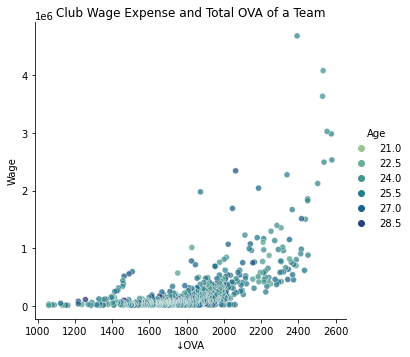

In [48]:
sns.relplot(x='↓OVA', y = 'Wage', data=data_23, kind='scatter',palette='crest', hue='Age', alpha=0.75)

plt.title('Club Wage Expense and Total OVA of a Team')

plt.show()

        When a team's OVA reaches a range of approximately 2200 to 2400, increasing the wage expense does not result in a significant additional OVA boost for the team.
        Let's remove the outliers and see what the scatterplot of the majority of clubs looks like.


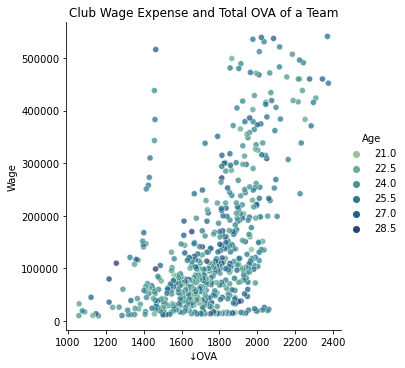

In [49]:
# Here I will use IQR interquartile range method to remove outliers.

q1, q3 = np.percentile(data_23.Wage,[25,75])

iqr_value = q3 - q1
lower_boundary = q1 - iqr_value * 1.5
upper_boundary = q3 + iqr_value * 1.5

data_23 = data_23.query('Wage >= @lower_boundary and Wage <= @upper_boundary')


sns.relplot(x='↓OVA', y = 'Wage', data=data_23, kind='scatter',palette='crest', hue='Age', alpha=0.75)
plt.title('Club Wage Expense and Total OVA of a Team')

plt.show()

        It's possible to build a relatively strong and competitive young team with only 1/10 to 1/4 of the budget compared  
        to those that spend millions on wages.

#### 2.4 For those competitive young team in 2.3, what position they focus on.

In [50]:
data_24 = df[df.Club.isin(data_23[data_23['↓OVA'] > 2200].Club.values)]

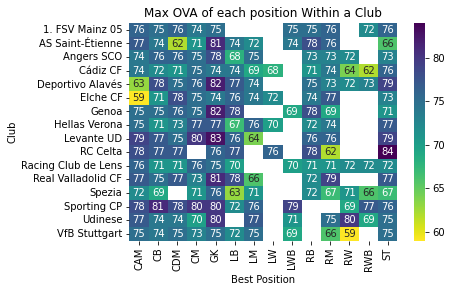

In [51]:
# Obtain the maximum OVA for each position within each club.
data_241 = data_24.groupby(['Club','Best Position'])['↓OVA'].max().unstack()
data_241
sns.heatmap(data_241, annot=True, cmap='viridis_r')

plt.title('Max OVA of each position Within a Club')
plt.show()

7 out 16 clubs have a good GK(GOALKEEPER) with OVA >= 80. 
Majority of clubs would like the center positions (CB, CDM, CM, CAM)  OVA higher that left side or right side positions.
3 of clubs have a really ST (STRIKER).

The heatmap indicated that most clubs would like to play defence and look for oppuntiy to attack the opposnent when they play defense successfuly.

#### 2.5 Which countries should club managers look to for potential talent to develop?

If the manager looking for the starting players. From the 2.4 heatmap of max OVA positions, most of them are above 70.
Let's set the condition of OVA between 70-84 and pull the data from all players.

In [52]:
data_25 = df[(df['↓OVA']>=70) & (df['↓OVA'] <=84)]

In [53]:
data_25 = data_25.groupby(['Nationality','Best Position']).agg({'↓OVA':'mean', 'Age':['mean','count']})
data_25.columns = ['_'.join(col) for col in data_25.columns.values]

In [54]:
data_25 = data_25.reset_index().sort_values(('Age_count'), ascending = False)
data_25 = data_25.query('Age_count >18')
data_25 = data_25.rename(columns={'Age_count':'players_count'})

In [55]:
data_25.head(35)

,Nationality,Best Position,↓OVA_mean,Age_mean,players_count
92,Brazil,CB,73.972727,27.018182,110
20,Argentina,CB,72.922078,29.350649,77
288,France,CB,74.528571,26.171429,70
91,Brazil,CAM,74.176471,25.073529,68
263,England,CB,73.671875,27.031250,64
744,Spain,CB,74.209677,28.274194,62
743,Spain,CAM,75.016393,25.475410,61
33,Argentina,ST,73.586207,28.913793,58
105,Brazil,ST,73.526316,26.842105,57
316,Germany,CB,74.145455,26.672727,55


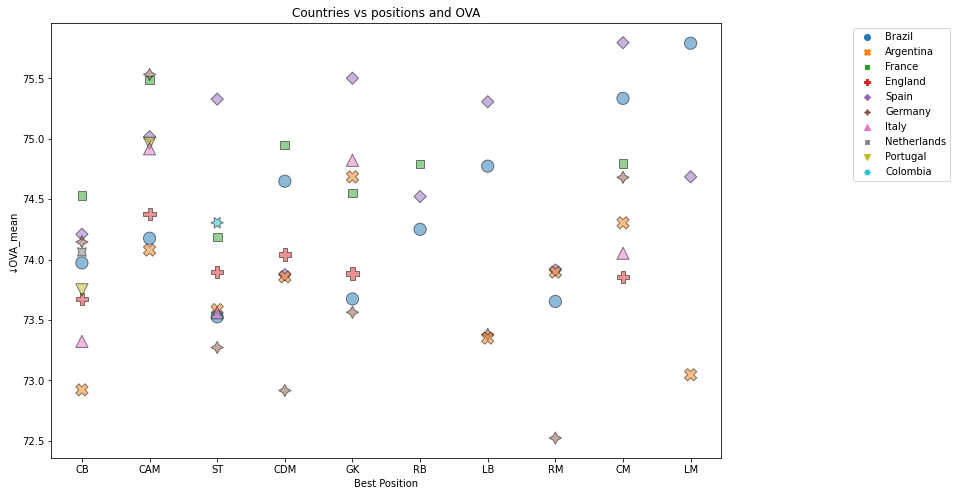

In [56]:
plt.figure(figsize=(12, 8))

sns.scatterplot(x='Best Position', y='↓OVA_mean', 
                    s=150,
                    data=data_25, 
                    hue = 'Nationality', 
                    alpha = 0.5,
                    edgecolor = 'black',
                    style = 'Nationality'
               )

plt.legend(loc='upper right',bbox_to_anchor=(1.35, 1))

plt.title("Countries vs positions and OVA")

plt.show()

Summary of countries to scout talented players in various positions:  
Spain excels in developing talented players for the ST, CDM, LB, CM, and RM positions.  
France boasts the highest average OVA among its players for CB, CAM, CDM, and RB positions compared to the other 11 countries.  
Argentina is also a favorable option for the RM position.  
Germany has the largest number of players with the highest average OVA in CAM positions.  
Brazil should be taken into account for LM and RM positions.  